In [639]:
# Importing required Libraries.
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm

from scipy import stats
from scipy.stats import norm,skew
from scipy.stats.stats import pearsonr
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing

In [640]:
# Ignore all warnings and never print.
warnings.filterwarnings('ignore')

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Getting information about the datasets.
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [641]:
# Displaying first 5(default) Data rows.
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [642]:
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [643]:
# Displaying the order(shape) of the matrix dataset.
train_data.shape

(1460, 81)

In [644]:
test_data.shape

(1459, 80)

In [645]:
# Storing Ids for future reference.
tr_id = train_data['Id']
ts_id = test_data['Id']

# Dropping the Id column(not used in prediction).
train_data.drop('Id', axis = 1, inplace = True)
test_data.drop('Id', axis = 1, inplace = True)

In [646]:
# Checking whether the Id column is dropped or not.
train_data.shape

(1460, 80)

In [647]:
test_data.shape

(1459, 79)

In [648]:
# Displaying Dataset after dropping the Id column.
train_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [649]:
test_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RH         80.0    11622   Pave   NaN      Reg   
1          20       RL         81.0    14267   Pave   NaN      IR1   
2          60       RL         74.0    13830   Pave   NaN      IR1   
3          60       RL         78.0     9978   Pave   NaN      IR1   
4         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub    Inside  ...         120        0    NaN  MnPrv   
1         Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
3         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
4         HLS    AllPub    Inside  ...         144        0    NaN    NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       6    2010        WD         Normal  
1        Gar2   12500       6    2010        WD         Normal  
2         NaN       0       3    2010        WD         Normal  
3         NaN       0       6    2010        WD         Normal  
4         NaN       0       1    2010        WD         Normal  

[5 rows x 79 columns]

In [650]:
# Getting description of all numerical features.
train_data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

Text(0.5, 1.0, 'SalePrice Distribution')

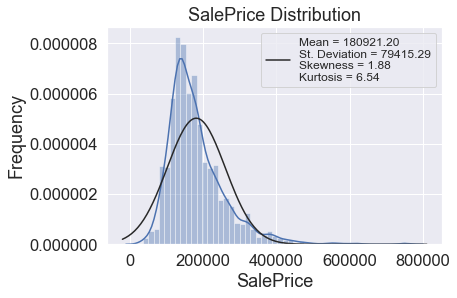

In [651]:
# Analysing the Test variable.
sns.distplot(train_data['SalePrice'], fit = norm)
# Calculating the mean and standard deviation.
(m, std) = norm.fit(train_data['SalePrice'])

# Checking and measuring Skewness and Kurtosis.
plt.legend(['Mean = {:.2f}\nSt. Deviation = {:.2f}\nSkewness = {:.2f}\nKurtosis = {:.2f}'.format(m, std, train_data['SalePrice'].skew(),train_data['SalePrice'].kurt())], fontsize = 12)
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

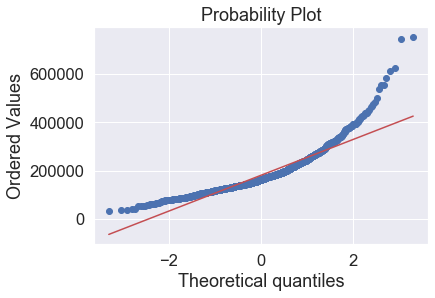

In [652]:
# Calculating the best-fit line.
plt.figure()
stats.probplot(train_data['SalePrice'], plot = plt)
plt.show()

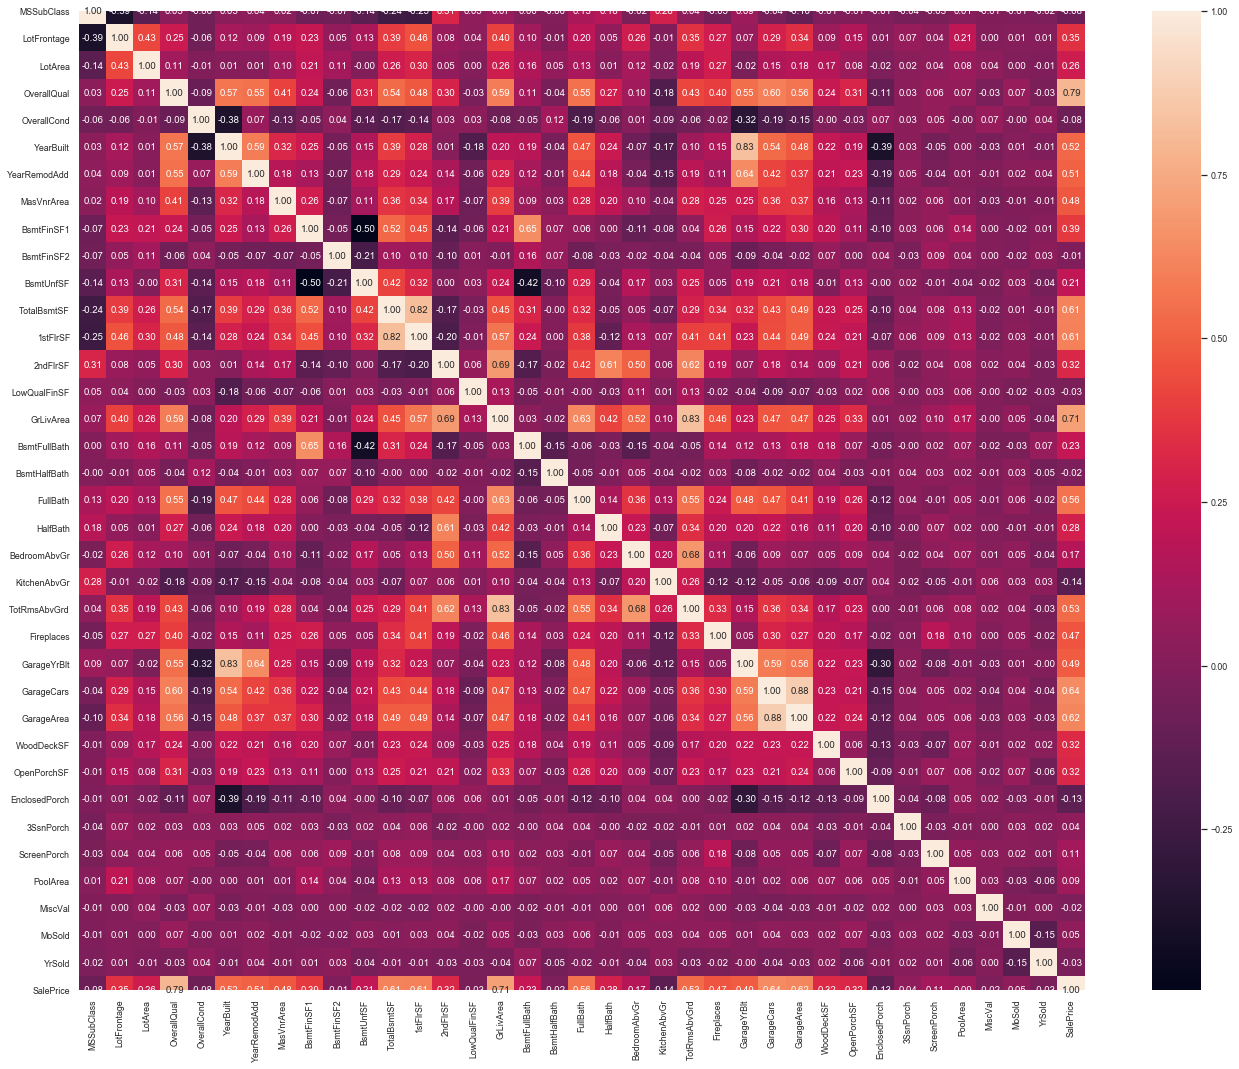

In [653]:
# Not considering categorical datatypes. 
# Plotting Correlation Heatmap with .2f float value.
train_corr = train_data.corr()
plt.figure(figsize=(24, 18))
sns.set(font_scale = 0.8)
sns.heatmap(train_corr, vmax = 1.0, square = True, annot = True, fmt = '.2f')
plt.show()

In [654]:
# Getting the index of top 10 largest correlation value.
col = train_corr.nlargest(10,'SalePrice').index
print(pd.DataFrame(col))

# Storing the Pearson Product-Moment Correlation Coefficients.
coef = np.corrcoef(train_data[col].values.T)

              0
0     SalePrice
1   OverallQual
2     GrLivArea
3    GarageCars
4    GarageArea
5   TotalBsmtSF
6      1stFlrSF
7      FullBath
8  TotRmsAbvGrd
9     YearBuilt


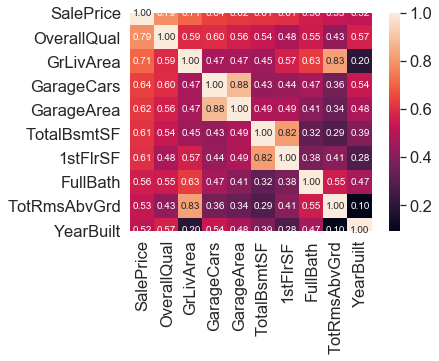

In [655]:
# Plotting Correlation Heatmap with .2f float value of the top 10 index.
plt.figure(figsize=(6,4))
sns.set(font_scale=1.5)
sns.heatmap(coef, vmax = 1.0, square = True, annot = True, fmt = '.2f', yticklabels = col.values, xticklabels = col.values, annot_kws={'size': 10})
plt.show()

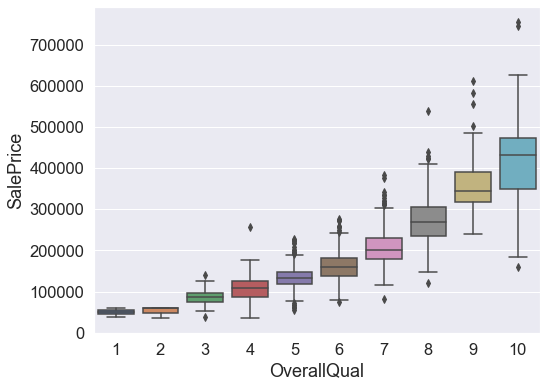

In [656]:
# Box Plot - OverallQual vs SalePrice.
data_overall_saleprice = pd.concat([train_data['SalePrice'], train_data['OverallQual']], axis = 1)
plt.figure(figsize=(8,6))
sns.boxplot(x = 'OverallQual',y = 'SalePrice', data = data_overall_saleprice)
plt.show()

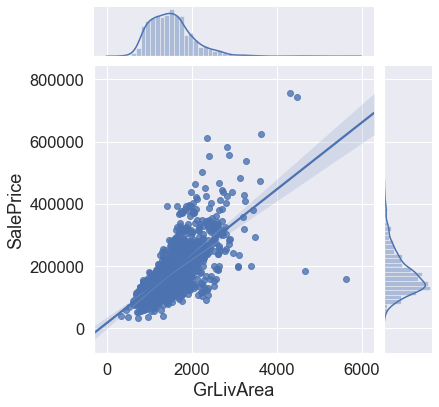

In [657]:
# Joint Plot - GrLivArea vs SalePrice.
sns.jointplot(x = train_data['GrLivArea'], y = train_data['SalePrice'], kind = 'reg')

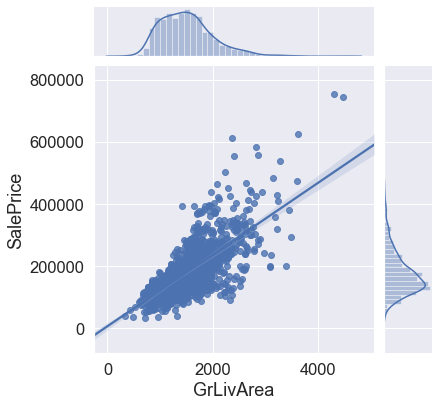

In [658]:
# Now droping the outliers GrLivArea > 4000 and SalePrice < 300000.
# Plotting the Joint Plot again.
train_data = train_data.drop(train_data[(train_data['GrLivArea'] > 4000) & (train_data['SalePrice'] < 300000)].index).reset_index(drop = True)
sns.jointplot(x = train_data['GrLivArea'], y = train_data['SalePrice'], kind = 'reg')

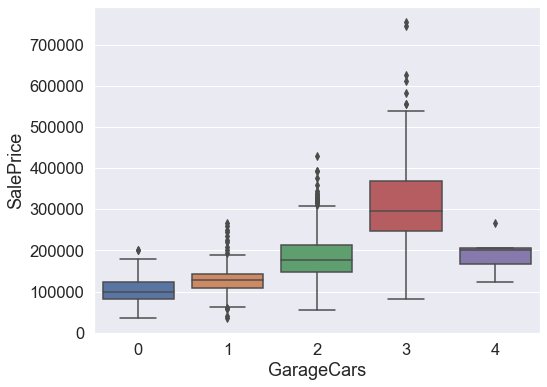

In [659]:
# Box Plot - GarageCars vs SalePrice.
data_garagecars_saleprice = pd.concat([train_data['SalePrice'], train_data['GarageCars']], axis = 1)
plt.figure(figsize=(8,6))
sns.boxplot(x = 'GarageCars',y = 'SalePrice', data = data_garagecars_saleprice)
plt.show()

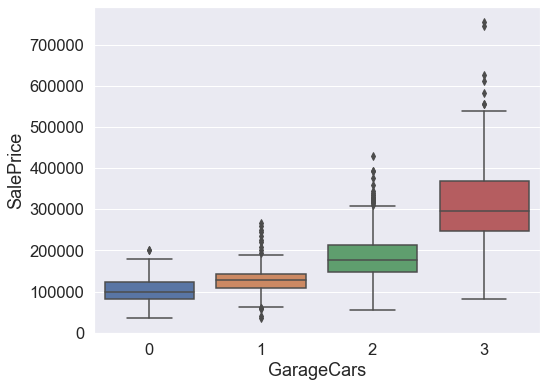

In [660]:
# Now droping the outliers GarageCars > 3 and SalePrice < 300000.
# Plotting the Box Plot again.
train_data = train_data.drop(train_data[(train_data['GarageCars'] > 3) & (train_data['SalePrice'] < 300000)].index).reset_index(drop = True)
data_garagecars_saleprice = pd.concat([train_data['SalePrice'], train_data['GarageCars']], axis = 1)
plt.figure(figsize=(8,6))
sns.boxplot(x = 'GarageCars',y = 'SalePrice', data = data_garagecars_saleprice)
plt.show()

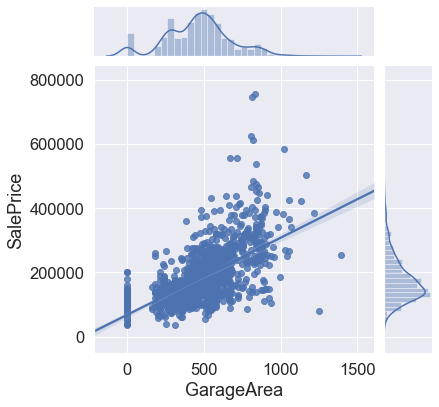

In [661]:
# Joint Plot - GarageArea vs SalePrice.
sns.jointplot(x = train_data['GarageArea'], y = train_data['SalePrice'], kind = 'reg')

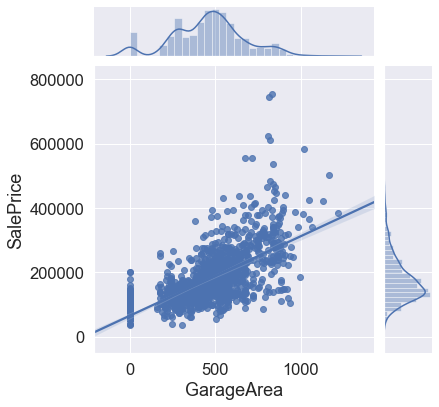

In [662]:
# Now droping the outliers GarageArea > 1000 and SalePrice < 300000.
# Plotting the Joint Plot again.
train_data = train_data.drop(train_data[(train_data['GarageArea'] > 1000) & (train_data['SalePrice'] < 300000)].index).reset_index(drop = True)
sns.jointplot(x = train_data['GarageArea'], y = train_data['SalePrice'], kind = 'reg')

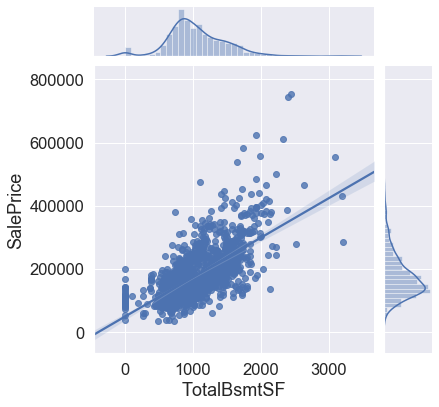

In [663]:
# Joint Plot - TotalBsmtSF vs SalePrice.
sns.jointplot(x = train_data['TotalBsmtSF'], y = train_data['SalePrice'], kind = 'reg')

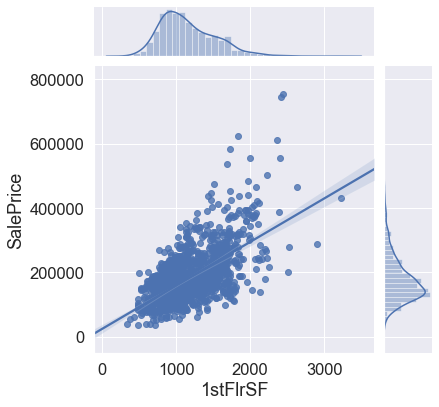

In [664]:
# Joint Plot - 1stFlrSF vs SalePrice.
sns.jointplot(x = train_data['1stFlrSF'], y = train_data['SalePrice'], kind = 'reg')

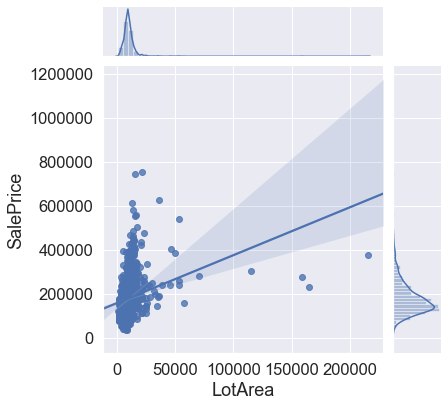

In [665]:
# Joint Plot - LotArea vs SalePrice.
sns.jointplot(x = train_data['LotArea'], y = train_data['SalePrice'], kind = 'reg')

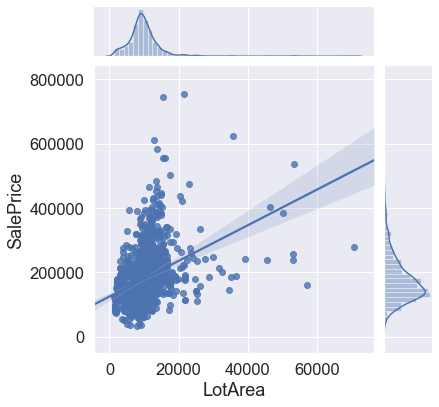

In [666]:
# Now droping the outliers LotArea > 100000 and SalePrice < 400000.
# Plotting the Joint Plot again.
train_data = train_data.drop(train_data[(train_data['LotArea'] > 100000) & (train_data['SalePrice'] < 400000)].index).reset_index(drop = True)
sns.jointplot(x = train_data['LotArea'], y = train_data['SalePrice'], kind = 'reg')

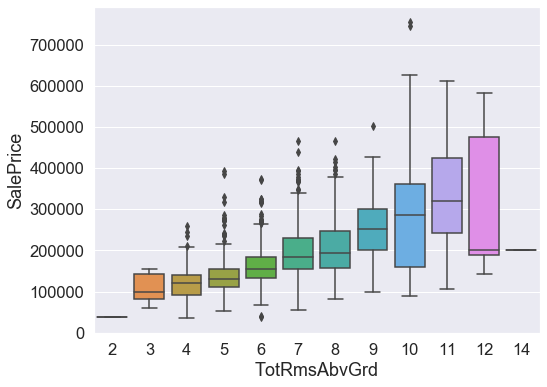

In [667]:
# Bar Plot - TotRmsAbvGrd vs SalePrice.
data_totalroom_saleprice = pd.concat([train_data['SalePrice'], train_data['TotRmsAbvGrd']], axis = 1)
plt.figure(figsize=(8,6))
sns.boxplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = data_totalroom_saleprice)
plt.show()

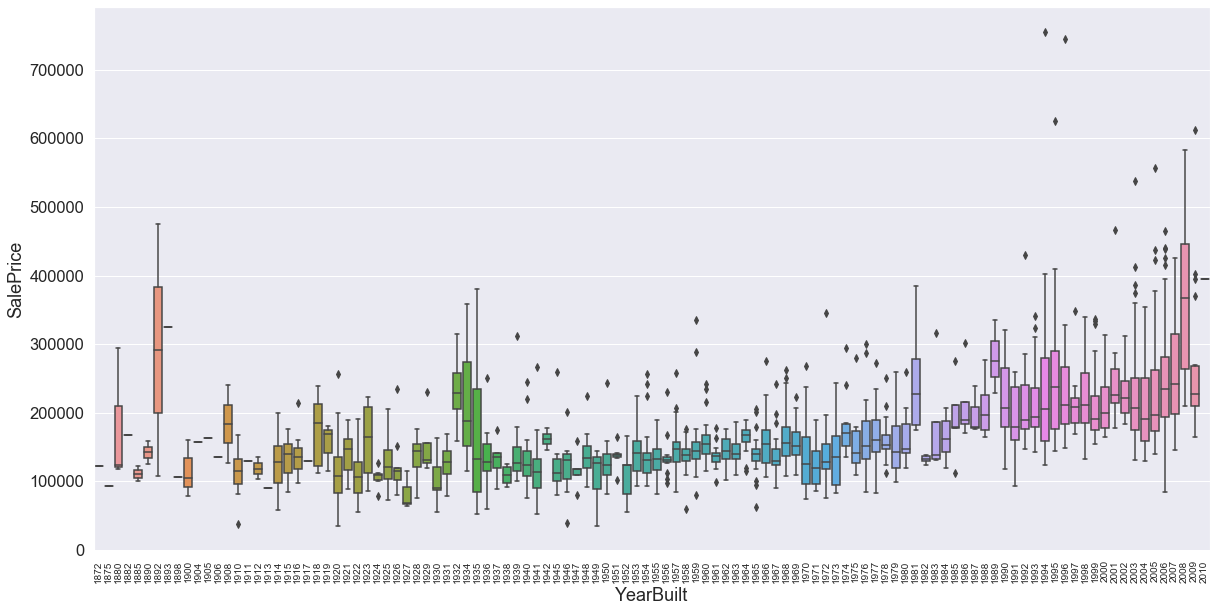

In [668]:
# Bar Plot - YearBuilt  vs SalePrice.
data_yearbuilt_saleprice = pd.concat([train_data['SalePrice'], train_data['YearBuilt']], axis = 1)
plt.figure(figsize=(20,10))
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = data_yearbuilt_saleprice)
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

In [669]:
# Finding Missing Data and Cleaning the Data.
# Let's combine the train and test dataset to get the overall missing data.

combined_data = pd.concat((train_data, test_data)).reset_index(drop = True)
combined_data.drop(['SalePrice'], axis = 1, inplace = True)

# Checking if the SalePrice is dropped or not.
combined_data.describe()

1stFlrSF    2ndFlrSF    3SsnPorch  BedroomAbvGr   BsmtFinSF1  \
count  2903.000000  2903.00000  2903.000000   2903.000000  2902.000000   
mean   1156.517051   335.39063     2.616604      2.858767   438.594073   
std     384.954258   427.67404    25.256767      0.821845   443.470644   
min     334.000000     0.00000     0.000000      0.000000     0.000000   
25%     876.000000     0.00000     0.000000      2.000000     0.000000   
50%    1080.000000     0.00000     0.000000      3.000000   368.000000   
75%    1383.000000   703.50000     0.000000      3.000000   732.000000   
max    5095.000000  2065.00000   508.000000      8.000000  4010.000000   

        BsmtFinSF2  BsmtFullBath  BsmtHalfBath    BsmtUnfSF  EnclosedPorch  \
count  2902.000000   2901.000000   2901.000000  2902.000000    2903.000000   
mean     49.522398      0.428128      0.061013   559.773604      23.092663   
std     169.022801      0.522020      0.245090   438.861486      64.046385   
min       0.000000      0.000000      0.000000     0.000000       0.000000   
25%       0.000000      0.000000      0.000000   220.000000       0.000000   
50%       0.000000      0.000000      0.000000   466.500000       0.000000   
75%       0.000000      1.000000      0.000000   801.000000       0.000000   
max    1526.000000      3.000000      2.000000  2336.000000    1012.000000   

       ...  OverallCond  OverallQual     PoolArea  ScreenPorch  TotRmsAbvGrd  \
count  ...  2903.000000  2903.000000  2903.000000  2903.000000   2903.000000   
mean   ...     5.566655     6.085773     2.098863    16.150878      6.442646   
std    ...     1.114229     1.405371    34.644332    56.326342      1.561754   
min    ...     1.000000     1.000000     0.000000     0.000000      2.000000   
25%    ...     5.000000     5.000000     0.000000     0.000000      5.000000   
50%    ...     5.000000     6.000000     0.000000     0.000000      6.000000   
75%    ...     6.000000     7.000000     0.000000     0.000000      7.000000   
max    ...     9.000000    10.000000   800.000000   576.000000     15.000000   

       TotalBsmtSF   WoodDeckSF    YearBuilt  YearRemodAdd       YrSold  
count  2902.000000  2903.000000  2903.000000   2903.000000  2903.000000  
mean   1047.890076    93.312780  1971.288322   1984.230451  2007.792628  
std     428.875800   125.978872    30.271455     20.895071     1.316696  
min       0.000000     0.000000  1872.000000   1950.000000  2006.000000  
25%     791.250000     0.000000  1953.000000   1965.000000  2007.000000  
50%     988.000000     0.000000  1973.000000   1993.000000  2008.000000  
75%    1300.000000   168.000000  2001.000000   2004.000000  2009.000000  
max    5095.000000  1424.000000  2010.000000   2010.000000  2010.000000  

[8 rows x 36 columns]

In [670]:
# Finding missing ratio of the Dataset.
combined_data_na =  (combined_data.isnull().sum() / len(combined_data)) * 100
combined_data_na = combined_data_na.drop(combined_data_na[combined_data_na == 0].index)
missing_ratio = pd.DataFrame({'Missing Ratio':combined_data_na})
missing_ratio

Missing Ratio
Alley             93.213917
BsmtCond           2.824664
BsmtExposure       2.824664
BsmtFinSF1         0.034447
BsmtFinSF2         0.034447
BsmtFinType1       2.721323
BsmtFinType2       2.755770
BsmtFullBath       0.068894
BsmtHalfBath       0.068894
BsmtQual           2.790217
BsmtUnfSF          0.034447
Electrical         0.034447
Exterior1st        0.034447
Exterior2nd        0.034447
Fence             80.365140
FireplaceQu       48.777127
Functional         0.068894
GarageArea         0.034447
GarageCars         0.034447
GarageCond         5.477093
GarageFinish       5.477093
GarageQual         5.477093
GarageType         5.408198
GarageYrBlt        5.477093
KitchenQual        0.034447
LotFrontage       16.603514
MSZoning           0.137788
MasVnrArea         0.792284
MasVnrType         0.826731
MiscFeature       96.486393
PoolQC            99.689976
SaleType           0.034447
TotalBsmtSF        0.034447
Utilities          0.068894

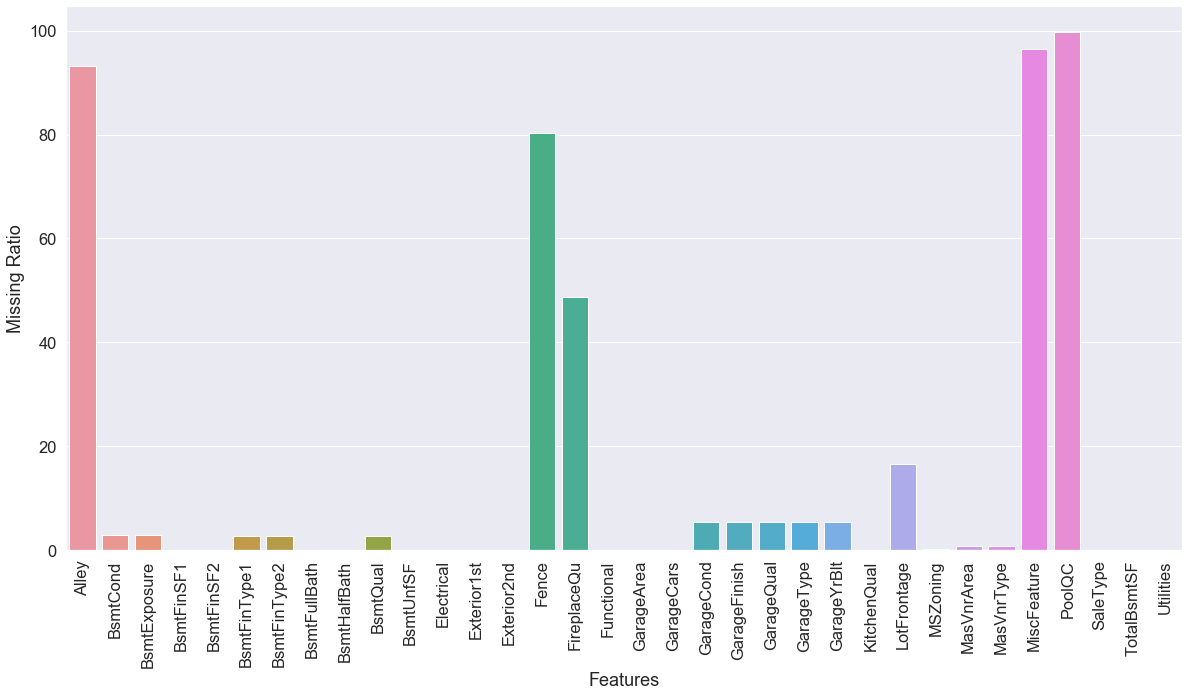

In [671]:
# Plotting Bar Graph for the Missing Ratios.
plt.figure(figsize=(20,10))
sns.barplot(x = combined_data_na.index, y = combined_data_na)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Missing Ratio')
plt.show()

In [672]:
# Imputing Missing Data Values according to the given Data Description.

# for these categorical features, data description 'NA' means "Feature Absent".
for col in ('PoolQC','MiscFeature','GarageType','Alley','Fence','FireplaceQu','GarageFinish',
           'GarageQual','GarageCond','MasVnrType','MSSubClass','BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    combined_data[col] = combined_data[col].fillna('None')
    
# for these numerical features, if no garage(= 0) means no car, and no basement means basement features = 0.
for col in ('GarageYrBlt','GarageArea', 'GarageCars', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
            'BsmtHalfBath', 'MasVnrArea'):
    combined_data[col] = combined_data[col].fillna(0)
    
# Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood.
# We can fill in missing values by the median LotFrontage of the neighborhood.
combined_data['LotFrontage'] = combined_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Functional : Data description says 'NA' means typical.
combined_data['Functional'] = combined_data['Functional'].fillna('Typ')

# Mode Values for missing data.
for col in ('MSZoning','Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    combined_data[col] = combined_data[col].fillna(combined_data[col].mode()[0])

# For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA.
# Since 'NoSewa' feature won't help in predictive modelling. We can then safely drop it.
combined_data = combined_data.drop(['Utilities'], axis = 1)

In [673]:
# Transforming the type of data from numerical to categorical of categorical features.
combined_data['MSSubClass'] = combined_data['MSSubClass'].apply(str)
combined_data['OverallCond'] = combined_data['OverallCond'].astype(str)
combined_data['YrSold'] = combined_data['YrSold'].astype(str)
combined_data['MoSold'] = combined_data['MoSold'].astype(str)

In [674]:
# Checking the new no. of numerical features(32).
combined_data.describe()

1stFlrSF    2ndFlrSF    3SsnPorch  BedroomAbvGr   BsmtFinSF1  \
count  2903.000000  2903.00000  2903.000000   2903.000000  2903.000000   
mean   1156.517051   335.39063     2.616604      2.858767   438.442990   
std     384.954258   427.67404    25.256767      0.821845   443.468947   
min     334.000000     0.00000     0.000000      0.000000     0.000000   
25%     876.000000     0.00000     0.000000      2.000000     0.000000   
50%    1080.000000     0.00000     0.000000      3.000000   368.000000   
75%    1383.000000   703.50000     0.000000      3.000000   732.000000   
max    5095.000000  2065.00000   508.000000      8.000000  4010.000000   

        BsmtFinSF2  BsmtFullBath  BsmtHalfBath    BsmtUnfSF  EnclosedPorch  \
count  2903.000000   2903.000000   2903.000000  2903.000000    2903.000000   
mean     49.505339      0.427833      0.060971   559.580779      23.092663   
std     168.996177      0.521961      0.245011   438.908846      64.046385   
min       0.000000      0.000000      0.000000     0.000000       0.000000   
25%       0.000000      0.000000      0.000000   220.000000       0.000000   
50%       0.000000      0.000000      0.000000   466.000000       0.000000   
75%       0.000000      1.000000      0.000000   801.000000       0.000000   
max    1526.000000      3.000000      2.000000  2336.000000    1012.000000   

       ...       MiscVal  OpenPorchSF  OverallQual     PoolArea  ScreenPorch  \
count  ...   2903.000000  2903.000000  2903.000000  2903.000000  2903.000000   
mean   ...     50.499828    47.369273     6.085773     2.098863    16.150878   
std    ...    568.686675    67.227291     1.405371    34.644332    56.326342   
min    ...      0.000000     0.000000     1.000000     0.000000     0.000000   
25%    ...      0.000000     0.000000     5.000000     0.000000     0.000000   
50%    ...      0.000000    26.000000     6.000000     0.000000     0.000000   
75%    ...      0.000000    70.000000     7.000000     0.000000     0.000000   
max    ...  17000.000000   742.000000    10.000000   800.000000   576.000000   

       TotRmsAbvGrd  TotalBsmtSF   WoodDeckSF    YearBuilt  YearRemodAdd  
count   2903.000000  2903.000000  2903.000000  2903.000000   2903.000000  
mean       6.442646  1047.529108    93.312780  1971.288322   1984.230451  
std        1.561754   429.242734   125.978872    30.271455     20.895071  
min        2.000000     0.000000     0.000000  1872.000000   1950.000000  
25%        5.000000   790.000000     0.000000  1953.000000   1965.000000  
50%        6.000000   988.000000     0.000000  1973.000000   1993.000000  
75%        7.000000  1300.000000   168.000000  2001.000000   2004.000000  
max       15.000000  5095.000000  1424.000000  2010.000000   2010.000000  

[8 rows x 32 columns]

In [675]:
# Let's take a look at Categorical Data after transforming and imputing missing values.
# Checking the number of categorical (object) data types.
cat_object = combined_data.select_dtypes(include=['object']).columns
print('Total Categorical Features : ',len(cat_object))
print('\n',cat_object)

Total Categorical Features :  46

 Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'MoSold', 'Neighborhood', 'OverallCond', 'PavedDrive', 'PoolQC',
       'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street',
       'YrSold'],
      dtype='object')


In [676]:
# Displaying the Categorical Data (Set 1).
combined_data[['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond']].head()

Alley BldgType BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtQual  \
0  None     1Fam       TA           No          GLQ          Unf       Gd   
1  None     1Fam       TA           Gd          ALQ          Unf       Gd   
2  None     1Fam       TA           Mn          GLQ          Unf       Gd   
3  None     1Fam       Gd           No          ALQ          Unf       TA   
4  None     1Fam       TA           Av          GLQ          Unf       Gd   

  CentralAir Condition1 Condition2 Electrical ExterCond ExterQual Exterior1st  \
0          Y       Norm       Norm      SBrkr        TA        Gd     VinylSd   
1          Y      Feedr       Norm      SBrkr        TA        TA     MetalSd   
2          Y       Norm       Norm      SBrkr        TA        Gd     VinylSd   
3          Y       Norm       Norm      SBrkr        TA        TA     Wd Sdng   
4          Y       Norm       Norm      SBrkr        TA        Gd     VinylSd   

  Exterior2nd Fence FireplaceQu Foundation Functional GarageCond  
0     VinylSd  None        None      PConc        Typ         TA  
1     MetalSd  None          TA     CBlock        Typ         TA  
2     VinylSd  None          TA      PConc        Typ         TA  
3     Wd Shng  None          Gd     BrkTil        Typ         TA  
4     VinylSd  None          TA      PConc        Typ         TA

In [677]:
# Displaying the Categorical Data (Set 2).
combined_data[['GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'MoSold', 'Neighborhood', 'OverallCond', 'PavedDrive', 'PoolQC']].head()

GarageFinish GarageQual GarageType Heating HeatingQC HouseStyle KitchenQual  \
0          RFn         TA     Attchd    GasA        Ex     2Story          Gd   
1          RFn         TA     Attchd    GasA        Ex     1Story          TA   
2          RFn         TA     Attchd    GasA        Ex     2Story          Gd   
3          Unf         TA     Detchd    GasA        Gd     2Story          Gd   
4          RFn         TA     Attchd    GasA        Ex     2Story          Gd   

  LandContour LandSlope LotConfig LotShape MSSubClass MSZoning MasVnrType  \
0         Lvl       Gtl    Inside      Reg         60       RL    BrkFace   
1         Lvl       Gtl       FR2      Reg         20       RL       None   
2         Lvl       Gtl    Inside      IR1         60       RL    BrkFace   
3         Lvl       Gtl    Corner      IR1         70       RL       None   
4         Lvl       Gtl       FR2      IR1         60       RL    BrkFace   

  MiscFeature MoSold Neighborhood OverallCond PavedDrive PoolQC  
0        None      2      CollgCr           5          Y   None  
1        None      5      Veenker           8          Y   None  
2        None      9      CollgCr           5          Y   None  
3        None      2      Crawfor           5          Y   None  
4        None     12      NoRidge           5          Y   None

In [678]:
# Displaying the Categorical Data (Set 3).
combined_data[['RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street',
       'YrSold']].head()

RoofMatl RoofStyle SaleCondition SaleType Street YrSold
0  CompShg     Gable        Normal       WD   Pave   2008
1  CompShg     Gable        Normal       WD   Pave   2007
2  CompShg     Gable        Normal       WD   Pave   2008
3  CompShg     Gable       Abnorml       WD   Pave   2006
4  CompShg     Gable        Normal       WD   Pave   2008

In [679]:
# Encoding the labels of categorical data to give meaning to their specific order.
from sklearn.preprocessing import LabelEncoder
features = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for col in features:
    lbe = LabelEncoder()
    lbe.fit(list(combined_data[col].values))
    # Replacing with the frequencies.
    combined_data[col] = lbe.transform(list(combined_data[col].values))
    
combined_data.shape

(2903, 78)

In [680]:
# Adding the total surface area and getting a new column to store the values.
combined_data['TotalSF'] = combined_data['TotalBsmtSF'] + combined_data['1stFlrSF'] + combined_data['2ndFlrSF']
combined_data.shape

(2903, 79)

In [681]:
# Checking the skew of all numerical features.
num_features = combined_data.dtypes[combined_data.dtypes != 'object'].index
skewed_features = combined_data[num_features].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
feature_skewness = pd.DataFrame({'Skewness': skewed_features})
print(feature_skewness.shape)
feature_skewness

(59, 1)


Skewness
MiscVal        21.919819
PoolArea       17.645761
LowQualFinSF   12.054942
3SsnPorch      11.344148
LandSlope       4.968102
KitchenAbvGr    4.325466
BsmtFinSF2      4.151024
EnclosedPorch   4.001207
BsmtHalfBath    3.947857
ScreenPorch     3.933936
LotArea         3.601954
MasVnrArea      2.629991
OpenPorchSF     2.525941
WoodDeckSF      1.842035
1stFlrSF        1.264329
LotFrontage     1.103286
GrLivArea       1.078053
TotalSF         1.019364
BsmtFinSF1      0.985193
BsmtUnfSF       0.920659
2ndFlrSF        0.862674
TotRmsAbvGrd    0.748411
Fireplaces      0.728207
HalfBath        0.692962
TotalBsmtSF     0.674522
BsmtFullBath    0.610478
OverallCond     0.567073
HeatingQC       0.487990
FireplaceQu     0.329561
BedroomAbvGr    0.314581
OverallQual     0.194731
FullBath        0.169684
GarageArea      0.156130
MSSubClass      0.137550
YrSold          0.132840
BsmtFinType1    0.086417
GarageCars     -0.252268
YearRemodAdd   -0.449953
BsmtQual       -0.488754
YearBuilt      -0.595295
GarageFinish   -0.610512
LotShape       -0.616713
MoSold         -0.644550
Alley          -0.670938
BsmtExposure   -1.123982
KitchenQual    -1.449400
ExterQual      -1.803070
Fence          -1.988574
ExterCond      -2.497939
BsmtCond       -2.865685
PavedDrive     -2.976212
BsmtFinType2   -3.042563
GarageQual     -3.063224
CentralAir     -3.458206
GarageCond     -3.583774
GarageYrBlt    -3.893538
Functional     -4.042690
Street        -16.950028
PoolQC        -21.166286

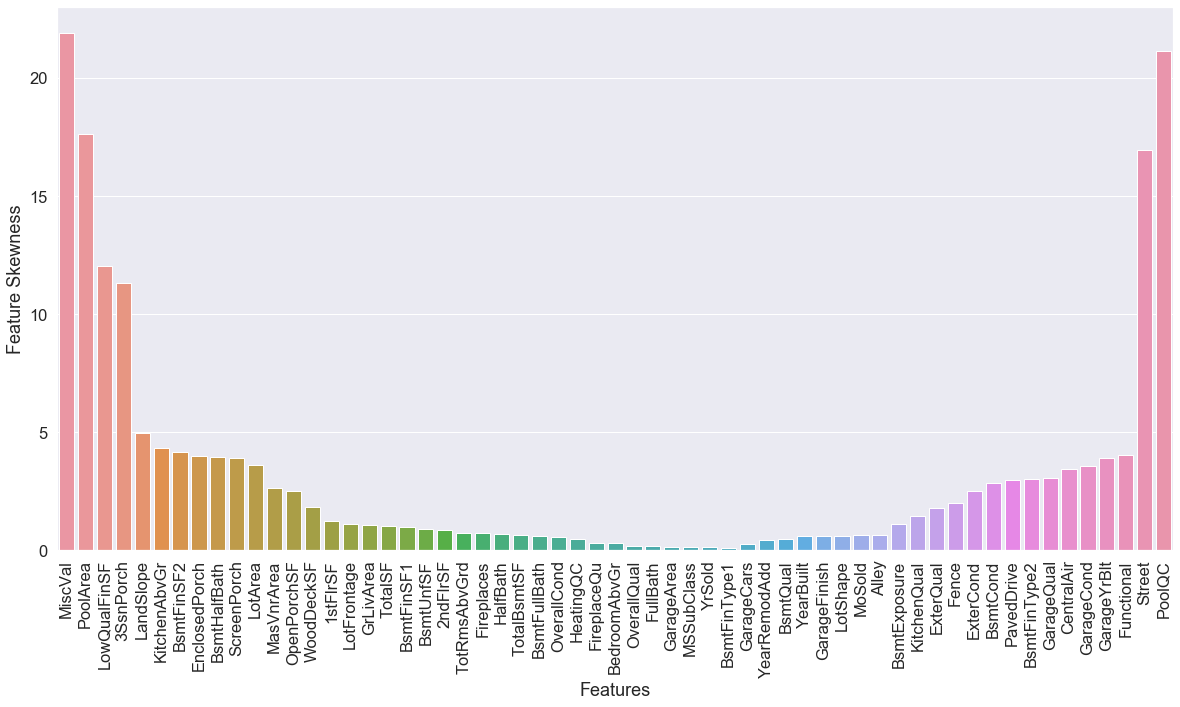

In [682]:
# Plotting Bar Graph for Skewness.
plt.figure(figsize=(20,10))
sns.barplot(x = skewed_features.index, y = abs(skewed_features))
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Skewness')
plt.show()

In [683]:
# Getting Box Cox Transormation of highly skewed features.
from scipy.special import boxcox1p 
feature_skewness = feature_skewness[abs(feature_skewness) > 0.75]

alpha = 0.15 # lambda
for col in skewed_features.index:
    combined_data[col] = boxcox1p(combined_data[col], alpha)

combined_data = pd.get_dummies(combined_data)
combined_data.shape

(2903, 220)

Text(0.5, 1.0, 'SalePrice Distribution')

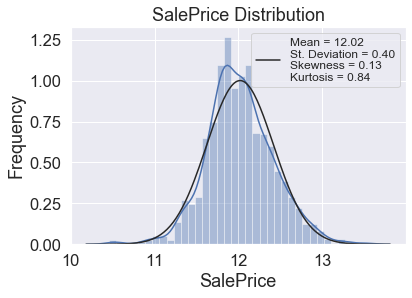

In [684]:
# Now let's fix the skewness and kurtosis.
# Fixing all skewed data to be more normal.
# The Numpy fuction log1p applies log(1+x) to all elements of the column.
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])

# Storing the value of train data 'SalePrice' for future reference.
train_saleprice = train_data.SalePrice.values

sns.distplot(train_data['SalePrice'], fit = norm)
(m, std) = norm.fit(train_data['SalePrice'])

# Checking and measuring Skewness and Kurtosis.
plt.legend(['Mean = {:.2f}\nSt. Deviation = {:.2f}\nSkewness = {:.2f}\nKurtosis = {:.2f}'.format(m, std, train_data['SalePrice'].skew(),train_data['SalePrice'].kurt())], fontsize = 12)
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

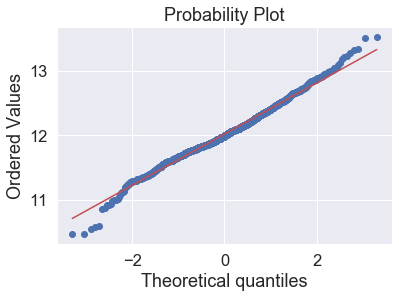

In [685]:
# Calculating the best-fit line.
plt.figure()
stats.probplot(train_data['SalePrice'], plot = plt)
plt.show()

In [686]:
# Splitting the combined_data into train_data and test_data.
no_of_train_data = train_data.shape[0]
# train_data SalePrice stored in train_saleprice during concatenation of datasets.

train_set = pd.DataFrame(combined_data[:no_of_train_data])
test_set = pd.DataFrame(combined_data[no_of_train_data:])
pd.DataFrame(train_set.values).head()

0          1    2         3         4         5         6    \
0  11.692623  11.686189  0.0  0.730463  1.540963  1.820334  1.540963   
1  12.792276   0.000000  0.0  0.730463  1.540963  1.820334  0.730463   
2  11.892039  11.724598  0.0  0.730463  1.540963  1.820334  1.194318   
3  12.013683  11.354094  0.0  0.730463  1.540963  0.730463  1.540963   
4  12.510588  12.271365  0.0  0.730463  1.820334  1.820334  0.000000   

         7    8         9    ...  210  211  212  213  214  215  216  217  218  \
0  11.170327  0.0  1.194318  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  12.062832  0.0  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  10.200343  0.0  1.194318  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   8.274266  0.0  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  10.971129  0.0  1.194318  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   219  
0  1.0  
1  1.0  
2  1.0  
3  1.0  
4  1.0  

[5 rows x 220 columns]

In [687]:
# Let's now implement Linear Regression Models - Lasso, ElasticNet, KernelRidge and Gradient Boosting Regressor.
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [688]:
# Cross Validation with K-folds with 5 number of folds.
def rmsle_cv(model):
    skf = StratifiedKFold(5, shuffle=True, random_state=42).get_n_splits(train_set.values)
    #kf = KFold(5, shuffle=True, random_state=42).get_n_splits(train_set.values)
    rmse = np.sqrt(-cross_val_score(model, train_set.values, train_saleprice, scoring="neg_mean_squared_error", cv = skf))
    
    return rmse

In [689]:
laso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))

elasnet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005, l1_ratio = 0.9, random_state = 3))

#kerridL = KernelRidge(alpha = 0.6, kernel = 'linear', degree = 1, coef0 = 2.5)

kerridP = KernelRidge(alpha = 0.6, kernel = 'polynomial', degree = 2, coef0 = 2.5)

gboost = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', random_state = 5, min_samples_split = 10, min_samples_leaf = 15)

In [690]:
score = rmsle_cv(laso)
# Displaying the Batch Scores.
print(pd.DataFrame({'Batch Score':score}))
print('Lasso Score           : (Mean = {:.5f}, Sigma = {:.5f})\n'.format(score.mean(), score.std()))

score = rmsle_cv(elasnet)
print(pd.DataFrame({'Batch Score':score}))
print('ElasticNet Score      : (Mean = {:.5f}, Sigma = {:.5f})\n'.format(score.mean(), score.std()))

#score = rmsle_cv(kerridL)
#print(pd.DataFrame({'Batch Score':score}))
#print('KernelRidge Score (L) : (Mean = {:.5f}, Sigma = {:.5f})\n'.format(score.mean() ,score.std()))

score = rmsle_cv(kerridP)
print(pd.DataFrame({'Batch Score':score}))
print('KernelRidge Score (P) : (Mean = {:.5f}, Sigma = {:.5f})\n'.format(score.mean() ,score.std()))

score = rmsle_cv(gboost)
print(pd.DataFrame({'Batch Score':score}))
print('GBoost Score          : (Mean = {:.5f}, Sigma = {:.5f})\n'.format(score.mean(), score.std()))


   Batch Score
0     0.104340
1     0.112695
2     0.124094
3     0.105024
4     0.109706
Lasso Score           : (Mean = 0.11117, Sigma = 0.00715)

   Batch Score
0     0.104161
1     0.112745
2     0.123992
3     0.104954
4     0.109819
ElasticNet Score      : (Mean = 0.11113, Sigma = 0.00716)

   Batch Score
0     0.106767
1     0.117535
2     0.127305
3     0.109945
4     0.112314
KernelRidge Score (P) : (Mean = 0.11477, Sigma = 0.00719)

   Batch Score
0     0.114646
1     0.124076
2     0.131051
3     0.110962
4     0.117422
GBoost Score          : (Mean = 0.11963, Sigma = 0.00714)



In [691]:
# Finding the average of all the four models.
class average_model(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    
    def fit(self, values, saleprice):
        # Cloning the original models to train and fit the data.
        self.models_ = [clone(x) for x in self.models]
        
        # Training the cloned models.
        for model in self.models_:
            model.fit(values, saleprice)
        
        return self
    
    # Predicting for cloned data and averaging out them.
    def predict(self, values):
        predictions = np.column_stack([
            model.predict(values) for model in self.models_
        ])
        
        return np.mean(predictions, axis = 1)

In [692]:
final_averaged_model = average_model(models = (laso, elasnet, kerridP, gboost))
final_score = rmsle_cv(final_averaged_model)
print('Final Averaged Model Score : (Mean = {:.5f}, Sigma = {:.5f})'.format(final_score.mean(), final_score.std()))

Final Averaged Model Score : (Mean = 0.10892, Sigma = 0.00732)


In [693]:
# Final Training and Prediction of the Averaged Model.
# Fitting Train Data
final_averaged_model.fit(train_set.values, train_saleprice)

final_train_predictions = final_averaged_model.predict(train_set.values)

test_predictions = np.expm1(final_averaged_model.predict(test_set.values))

print('RMSLE Score of the Train Data : ', np.sqrt(mean_squared_error(train_saleprice, final_train_predictions)))

print('Train Accuracy                : ', final_averaged_model.score(train_set.values, train_saleprice) * 100, '%')

#model = sm.OLS(test_predictions, test_set.values).fit()
#predict_ols = model.predict(test_set.values)
#model.summary() # Showing out the statistics

# Fitting Test Data
final_averaged_model.fit(test_set.values, test_predictions)

print('Test Accuracy                 : ', final_averaged_model.score(test_set.values, test_predictions) * 100, '%')

RMSLE Score of the Train Data :  0.07361905738053261
Train Accuracy                :  96.59288031792634 %
Test Accuracy                 :  99.03797371656613 %


In [694]:
# We reached to the final step - Submission.
submission = pd.DataFrame()
# Test Data ID stored in ts_id
submission['Id'] = ts_id
submission['SalePrice'] = test_predictions
submission.to_csv('Predictions.csv', index = False)
submission_data = pd.read_csv('Predictions.csv')
submission_data.head(10)

Id      SalePrice
0  1461  121097.077120
1  1462  163522.564523
2  1463  187248.612636
3  1464  197377.178947
4  1465  193291.463757
5  1466  172645.857414
6  1467  179985.513471
7  1468  160994.628361
8  1469  184696.511754
9  1470  121340.662613

Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  178367.937888
std     421.321334   77533.095182
min    1461.000000   43717.405907
25%    1825.500000  127026.477142
50%    2190.000000  157549.850084
75%    2554.500000  209517.578231
max    2919.000000  821602.441487

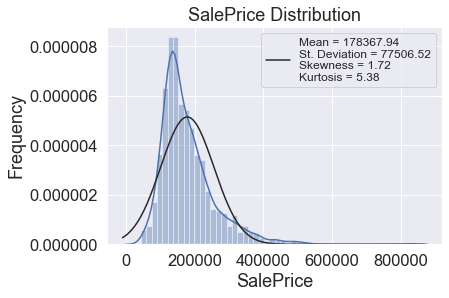

In [695]:
# Analysing the Submitted Test SalePrice
sns.distplot(submission_data['SalePrice'], fit = norm)
(m, std) = norm.fit(submission_data['SalePrice'])

# Checking and measuring Skewness and Kurtosis.
plt.legend(['Mean = {:.2f}\nSt. Deviation = {:.2f}\nSkewness = {:.2f}\nKurtosis = {:.2f}'.format(m, std, submission_data['SalePrice'].skew(), submission_data['SalePrice'].kurt())], fontsize = 12)
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

# Checking the parameters of Test SalePrice whether they are close to our Train Data SalePrice or not.
submission_data.describe()
# Since the data parameters approximately matches, hence we conclude.